---
title: Implementing Nash-Q Learning
date: 2020-02-21
header-includes:
  - \usepackage[ruled,vlined,linesnumbered]{algorithm2e}

---

### Introduction

Implementing single-agent reinforcement learning methods in multi-agent settings where both agents update their values simultaneously is a generally naive method which does not result in convergent policies. Hu and Wellman (2003) attribute this to a neglect of two issues specific to the multiagent context. Firstly, the environment is no longer stationary since the agents are simultaneously adapting; the result of an agent's choice is going to change based on the choice of the other agents. This means that the theoretical guarantees that support Q-learning no longer apply. If the results of the agent's choice was affected by some stochastic process, then measures could be taken to incorporte the properties in the update rules. However, in this case, non-stationarity is generated by other agents, which leads to the second issue that single-agent techniques ignore: these agents may be presumed rational or at least regular in some informative way. 

Here, we consider the Nash-Q learning algorithm for general-sum Markov games, an extension to the Q-learning algorithm. It was proposed by Hu and Wellman (2003), where, under relatively stringent assumptions, their method guarantees to find an equilibirum. We leave out the theoretical foundations and focus only on the algorithm. You can find the original paper [here](http://www.jmlr.org/papers/v4/hu03a.html). We assume familiarity with single-agent Q-learning, including the state-value and state-action-value functions. 

### Markov games

A **Markov game** is defined by a tuple $\left(\mathcal{N}, \mathcal{S}, \{ \mathcal{A^i} \}_{i \in \mathcal{N}}, \mathcal{P}, \{ \mathcal{R}^i \}_{i \in \mathcal{N}}, \gamma \right)$ where $\mathcal{N} = \{ 1, \dots, N \}$ denotes the set of $N>1$ agents, $\mathcal{S}$ denotes the state space observed by all agents, $\mathcal{A}^i$ denotes the action space of agent $i$. Let $\mathcal{A} := \mathcal{A}^1 \times \dots \times \mathcal{A}^N$ then $\mathcal{P} : \mathcal{S} \times \mathcal{A} \rightarrow \Delta (\mathcal{S})$ denotes the transition probability from any state $s \in \mathcal{S}$ to any state $s' \in \mathcal{S}$ for any joint action $a \in \mathcal{A}$; $R^i: \mathcal{S} \times \mathcal{A} \times \mathcal{S} \rightarrow \mathbb{R}$ is the reward function that determines the immediate reward received by agent $i$ for a transition from $(s,a)$ to $s'$; $\gamma \in [0,1]$ is the discount factor.

At time $t$, each agent $i \in \mathcal{N}$ executes an action $a_t^i$, according to the system state $s_t$. The system then transitions to state $s_{t+1}$ and rewards each agent $i$ by $R^i(s_t,a_t,s_{t+1})$. The goal of agent $i$ is to optimise its long-term reward, by finding the policy $\pi^i : \mathcal{S} \rightarrow \Delta (\mathcal{A}^i)$ such that $a^i_t \sim \pi^i(\cdot|s_t)$. 


### Nash Q-learning algorithm

The learning agent initialises the Q-values with arbitrary values at the beginning of the period. It then chooses an action, observes its own reward and the actions taken by the other agents and their rewards and the new state $s'$. With a learning rate $\alpha$, it then calculates the Nash equilibirum for the state game and updates its Q-values according to the update rule 

$$  Q^i_{t+1} (s,a^1,\dots,a^N) = (1-\alpha) \cdot Q^i_t(s,a^1,\dots,a^N) + \alpha \left[R^i_t + \gamma NashQ^i_t(s')\right]  $$

where 

$$ NashQ^i_t(s') = \pi^1(s')\dots\pi^N(s') \cdot Q^i_t(s')$$

In order to calculate the NE $(\pi^1(s')\dots\pi^N(s'))$, agent $i$ would have to know the other agent's Q-values. But this is not givem so agent $i$ must learn about them too. For this, the agent also initialises the other agent's Q-values and updates them according to the same rule as above. 

The summary of the algorithm is given below. 

![image.png](/img/posts/nash-q/nash-q-algo.png)
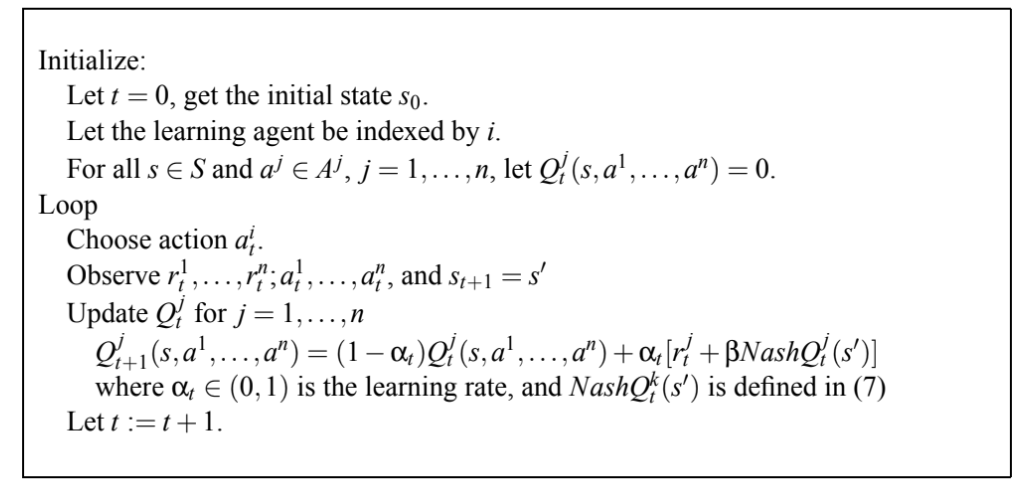

### Implementation 

For full implementation, see the github repo [here](https://github.com/martagrz/nash-q). 



![png](/img/posts/nash-q/optimal_policy_0_0.0.pdf)
![png](/img/posts/nash-q/optimal_policy_1_0.0.pdf)

#### Implementation with error

It is usually not possible for the agent to perfectly observe the other agents' rewards due to noise. We therefore investigate the effect of including an error in the rewards observed for the other agents on convergence. 

![png](/img/posts/nash-q/optimal_policy_0_0.5.pdf)
![png](/img/posts/nash-q/optimal_policy_1_0.5.pdf)

References

Zhang et al. (2019). 